This tutorial lists a few methods available for reading and analyzing track data. It works within [jupyter](http://jupyter.org/) and is written in [python](https://www.python.org/). For a quick start, consider the following:

1. This file is a *jupyter* script, similar to scripts you will create for your own analyses. Please **duplicate it** if you want to modify it.
3. A *jupyter* script is composed of *cells* which come in 3 flavors:
    * *markdown* cells such as this one.
    * *title* cells such **Initialization** below. Technically, it's a *markdown* cell containing a single line starting with one or more '#'. It can be used to hide following cells.
    * *code* cells such as the one starting with `#import all the code` whithin the **Initialization** group.
    
    Such cells allow creating graphics; the result from the last line are displayed below the cell. You will need to <Ctrl-Enter> every *code* cells in a row in order for this script to work.

3. Cells, whatever their flavor, can be:
    * *edited*: double-click on the cell to change the text or code. You can set the flavor using a drop-down in the menu bar.
    * *processed*: once in edit mode, press <Ctrl-Enter> (moves to next cell) or <Shift-Enter> (stays put).

4. There's more than this tutorial to the documentation. You can access it through any *code* cell by using a `?`. 

In [6]:
?

In [7]:
list?

# Initialization

Loading BokehJS ...


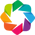

INFO:trackanalysis.scripting:scripting_v0.1-24-g0660a0e for jupyter


In [2]:
# import all the code
from scripting import *

# The path to the data.
# It will be used to initialize `Track` and `TracksDict` objects
PATH = "/home/pol/Documents/tracks/rnasequencing/"

We can create two types of objects:

## The `Track` Object

This is the basic object for reading track files.
The data from a track file, accessed lazily (only upon request).

The data can be read as:

```python
>>> raw = Track(path =  "/path/to/a/file.trk")
>>> grs = Track(path =  ("/path/to/a/file.trk",
...                      "/path/to/a/gr/directory",
...                      "/path/to/a/specific/gr"))
```

The data can then be accessed as follows:

* for the *time* axis: `raw.beads['t']`
* for the magnet altitude: `raw.beads['zmag']`
* specific beads: `raw.beads[0]` where 0 can be any bead number
* specific cycles: `raw.cycles[1,5]` where 1 and 5 can be any bead or cycle number.


Some slicing is possible:

* `raw.cycles[:,range(5,10)]` accesses cycles 5 though 10 for all beads.
* `raw.cycles[[2,5],...]` accesses all cycles for beads 5 and 5.

Only data for the Z axis is available. Use the `axis = 'X'` or `axis = 'Y'`
options in the constructor to access other data.

Other attributes are:

* `framerate` is this experiment's frame rate
* `fov` is the field of view data:

    * `image` is one image of the field of view
    * `dim` are conversion factors from pixel to nm
    * `beads` is a dictionnary of information per bead:

        * `position` is the bead's (X, Y, Z) position
        * `image` is the bead's calibration image

* `pathinfo` provides information on the path itself:

    * `paths`: a tuple of paths
    * `trackpath`: the main path, i.e. not the grs
    * `size` (*megabytes*) is the size in bytes (megabytes) of *trackpath*
    * `stat`: stats on the *trackpath*
    * `modification`: the date oflast modification. This is basically the
    time of experiment.

In [2]:
SINGLE = Track(path = f"{PATH}/AAG.pk")

### Selecting specific cycles depending on event positions

Its possible to select specific cycles depending on user-defined conditions
as follows:

```python
>> evts = TRACK1.events
>> evts.any < 5         # keys such that any event's mean is lower than 5
>> evts.all > 5         # keys such that all event means are greater than 5
>> evts.median.all > 5  # keys such that all event *medians* are greater than 5
>> evts[0].all > 5      # keys such that the first event's *mean* is greater than 5
>> evts.any.start > 5   # keys such that there are events starting after 5 frames
```

In the 4th line, any numpy function name is accepted. The default is nanmean.

In the 5th line, anything that can slice an np.array is accepted, although
no care is taken about its validity unless a simple index is provided.


## The `TracksDictObject`

This a dictionnary of tracks. It provides *lazy* access to tracks as well
as various methods for studying tracks together.

### Initialisation

It can be initialized using list of directories

```python
>>> TRACKS = TracksDict("/media/data/helicon/X/*/*.trk", # the path to .trk files
...                     "~/Seafile/X/*.cgr",             # Optional: the path to .cgr files
...                     #
...                     # Optional: We accept only files with _040_ in the name
...                     # and we take the following 3 letters as the track key
...                     match   = r".*_040_(\w\w\w)_.*")
```

We can now access the tracks as: `TRACKS['AAG']`, supposing the *AAG* oligo
was tested.

It's also possible to add specific tracks by providing a `Track` object, a
string or a list of strings:

```python
>>> TRACKS['specific'] = "/path/to/specific/track/file.trk"
```

#### Optional arguments:

* if `allleaves = True`, the parent directory containing the
gr-files is used for pairing gr and trk files.
* if `match = r".*_040_(\w\w\w)_.*"` is used (or any other regular
expression), only *track* file names matching the expression are accepted.
There must be one group (the parentheses) which will be used as the access
key. By default the track file name is used as a key.

In [8]:
%%opts Table[width=700]
TRACKS = TracksDict(f"{PATH}*.pk")
TRACKS

{'AAG': <data.track.Track at 0x7fa0656b3c18>,
 'ACC': <data.track.Track at 0x7fa0656b57b8>,
 'ACG': <data.track.Track at 0x7fa0656b3b38>,
 'ACT': <data.track.Track at 0x7fa0656b3eb8>,
 'AGC': <data.track.Track at 0x7fa0656b30b8>,
 'AGG': <data.track.Track at 0x7fa0656b5518>,
 'ATC': <data.track.Track at 0x7fa0656b5cf8>,
 'CAG': <data.track.Track at 0x7fa0656b5898>,
 'CAT': <data.track.Track at 0x7fa0656b5978>,
 'CCA': <data.track.Track at 0x7fa0656b5278>,
 'CGG': <data.track.Track at 0x7fa0656b3048>,
 'CGT': <data.track.Track at 0x7fa0656b5438>,
 'CTA': <data.track.Track at 0x7fa0656b5358>,
 'CTG': <data.track.Track at 0x7fa0656b3dd8>,
 'GAC': <data.track.Track at 0x7fa0656b56d8>,
 'GCA': <data.track.Track at 0x7fa0656b5a58>,
 'GCG': <data.track.Track at 0x7fa0656b5b38>,
 'GGA': <data.track.Track at 0x7fa0656b5c18>,
 'GTA': <data.track.Track at 0x7fa0656b55f8>,
 'TAA': <data.track.Track at 0x7fa0656b50b8>,
 'TAC': <data.track.Track at 0x7fa0656b3cf8>,
 'TCT': <data.track.Track at 0x7fa065677be0>,
 'TGA': <data.track.Track at 0x7fa0656b3f98>,
 'ref': <data.track.Track at 0x7fa0656b5198>}

### Shortcuts

`TracksDict.beads` returns the beads in common to all tracks in the `TracksDict`.

### Slicing

Providing a list of keys as argument creates a new `TracksDict` containing
only those keys. The same `Track` objects are used.

```python
>>> dico = TracksDict()
>>> dico.update(A = "a.trk", B = "b.trk", C = "c.trk")
>>> assert dico['A'].path == "a.trk"
```

```python
>>> fraction = dico[['A']]
>>> assert isinstance(fraction, TracksDict)
>>> assert set(fraction.keys()) == {'A'}
>>> assert fraction['A'] is dico['A']
```

Should a key start with with "~" (or should "~" appear in a list) then a `TracksDict` object is created containing all but that key.

```python
>>> assert set(dico['~A'].keys()) == {'B', 'C'}
>>> assert set(dico[['~', 'B', 'C'].keys()) == {'A'}
```

### Saving

It's possible to save the tracks to a '.pk' which are much faster at
loading. To save the files:

```python
>>> tracks.save("/path/to/my/saved/tracks")
```

The tracks are saved as "/path/to/my/saved/tracks/key.pk" files.
Thus, loading them is as simple as:

```python
>>> TRACKS = TracksDict("/path/to/my/saved/tracks/*.pk")
```

# Cleaning

##  Fixed-bead Subtraction and Other Track-specific Configurations

This can be done using the `Track.tasks` attribute. For example:

```python
>>> track.tasks.alignment    = ExtremumAlignmentTask(outlier = .8)
>>> track.tasks.alignment    = {'outlier': .8} # or using a dictionnary
>>> track.tasks.driftperbead = True            # activate with default settings
>>> track.tasks.driftperbead = False           # de-activate: go back to default behaviour
```

For bead subtraction, it's possible to provides the beads directly:

```python
>>> track.tasks.subtraction = 1    # subtracting bead 1 from all beads
>>> track.tasks.subtraction = 1, 2 # subtracting the mean of beads 1 and 2 from all beads
```

## Cleaning Bead Data

Both `Track` and `TracksDict` objects have a `cleaning` attribute which 
adds means for finding beads with cleaning warnings and possibly discarding
them. One can do:

* `tracks.cleaning.good()`: lists beads which are good throughout all tracks
* `tracks.cleaning.bad()`: lists beads bad at least in one track
* `tracks.cleaning.messages()`: lists all messages
* `tracks.cleaning.dropbad()`: returns a *TracksDict* with tracks with only
good beads loaded.

In [6]:
# Displays a list of warnings
SINGLE.cleaning

Empty DataFrame
Columns: [cycles, message, types]
Index: []

In [9]:
%%opts HeatMap[width=700]
# Displays a heat map of warnings issued from the cleaning.
# Check the tooltips on the graph
TRACKS.cleaning.display()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


# Viewing the Data

Its possible to view the data the exact same way as for accessing it: The last line in a cell is displayed by [jupyter](http://jupyter.org/) automatically.

Note that the displays are created through [holoviews](http://holoviews.org/) and [bokeh](http://bokeh.pydata.org/). It might be a good idea to look at their galleries should one want to create or add to current displays.

Viewing data for a `Track` or a `TracksDict` can be done in a similar way (see below). On the other hand, options will differ so  **please check the documentation** (do `Track.peaks?` in a cell).

In particular `Track.peaks` and `TracksDict.peaks` contain options for fitting peaks to a reference or to a sequence, either manually or automatically. **So check the documentation.**

In [20]:
SINGLE.fov

In [21]:
%opts Curve[width=300]{+framewise}
TRACKS.cycles

In [23]:
%opts Curve[width=300]{+framewise}
TRACKS.events

In [24]:
%opts Curve[width=300]
SINGLE.peaks

# Creating `pandas.DataFrame`

[pandas.DataFrame](http://pandas.pydata.org/) objects allow accessing tabular data for easy aggregations and displays. We can create frames both for `Track` and `TracksDict` objects and their views. Again please **check the documentation** for methods on both objects (`TRACK1.events.dataframe?`)

## Events DataFrames

Default columns are:

    * *event*: event number in the cycle
    * *start*: event start position in phase 5
    * *length*: event length
    * *avg*: event average position

It's possible to compute and return values on all events of a cycle using:

```python
>>> DataFrameTask(integral = lambda x: np.sum(np.concatenate(x['data'])))
```

It's also possible to transform the pd.DataFrame every iteration or assign
new values.

For example, the following code:

```python
>>> track.events.dataframe(begin     = lambda x: np.nanmean(x[:5]),
...                        end       = lambda x: np.nanmean(x[-5:])
...                        assign    = {'diff': lambda x: x.end.shift(0) - x.begin},
...                        transform = lambda x: x.dropna())
```

1. Computes z positions at the begining and the end of an event,
2. computes the difference in z between 2 consecutive events
3. drops rows with NaN values

Note that measures (here *begin* and *end*) are created prior to assignations
which are performed prior to transformations.

In [16]:
# create a frame for events in beads 0 and 69, cycles 1 and 5.
TRACK1.events[[0,69],[1,5]].dataframe()

avg  length  start
track bead cycle event                         
AAG   0    1     0      0.521414     9.0      0
                 1      0.155695   114.0     11
                 2      0.078438    27.0    128
                 3      0.029074   287.0    156
                 4      0.009808     8.0    444
           5     0      0.067770     5.0      0
                 1      0.021144   435.0      7
                 2     -0.012874     4.0    445
                 3     -0.004146     4.0    449
      69   5     0     -0.004730   443.0      0
                 1     -0.014344     6.0    443

## Peaks Dataframes

Columns are:

* *peakposition*
* *averageduration*
* *hybridisationrate*
* *eventcount*

### Aggregated values

If a *numpy* function or function name is provided in the measures, then it
is applied to the concatenation of all event data.

If a tuple of *numpy* functions or function names is provided in the
measures, then the second function is applied to each event independently and
the first is applied the array of results. Thus it is possible to measure the
resolution of a peak:

```python
>>> DataFrameTask(measures = dict(std = ('nanstd', 'nanmean')))
```

### Getting one row per event

One can also add information on events using:

```python
>>> DataFrameTask(measures = dict(events = True))
```

In such a case, added columns are:

* *cycle*: event cycle
* *start*: event start position
* *length*: event length
* *avg*: event average

The following will also measure each event's std:

```python
>>> DataFrameTask(measures = dict(events = dict(eventstd = np.nanstd)))
```

or

```python
>>> DataFrameTask(measures = dict(events = dict(eventstd = 'std')))
```

It's also possible to transform the pd.DataFrame every iteration or assign
new values as for events frames above.

## `TracksDict` dataframes

One can create dataframes for all tracks in one go using for example `TRACKS.peaks.dataframe()`.
Arguments allow adding columns as for single tracks.

Note that `TRACKS.peaks(reference = 'ref').dataframe()` will create a dataframe with the beads in different tracks fitted to their reference.